In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from ipywidgets import interact
import ipywidgets as widgets
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestRegressor

# Loading dataset

In [2]:
insurance =pd.read_csv('DS3_C6_S1_Regression_Insurance_Data_Project.csv')
insurance 

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


# Checking the data

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


In [5]:
insurance.shape

(1338, 8)

In [6]:
insurance.size

10704

In [7]:
insurance.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Checking null values.

In [8]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
def fill_null(insurance,i):
    if insurance['bmi'][i]< 18.5:
        return 'UW'
    elif (insurance['bmi'][i]> 18.5) & (insurance['bmi'][i]<= 24.9):
        return 'N'
    elif (insurance['bmi'][i]> 25) & (insurance['bmi'][i]<= 29.9):
        return 'PREO'
    elif (insurance['bmi'][i]> 30) & (insurance['bmi'][i]<= 34.9):
        return 'OB1'
    elif (insurance['bmi'][i]> 35) & (insurance['bmi'][i]<= 35.9):
        return 'OB2'
    else:
        return 'OB3'

In [10]:
lst=['PREO','OB1','N','OB2','OB3','UW']

In [11]:
for i in range(0,len(insurance)):
    if insurance['classif'][i] not in lst:
        insurance['classif'][i]= fill_null(insurance,i)

In [12]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
insurance2=insurance.copy()

In [14]:
insurance2.age.replace(to_replace=-58.,value=39,inplace=True)
insurance2.age.replace(to_replace=190,value=39,inplace=True)
insurance2.age.replace(to_replace=-1,value=39,inplace=True)

In [15]:
insurance2.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.123318,30.663397,1.094918,13270.422265
std,14.088157,6.098187,1.205493,12110.011237
min,0.000000,15.960000,0.000000,1121.873900
25%,26.250000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
numerical_data=insurance.select_dtypes(include=np.number)
numerical_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,0,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [17]:
categorical_data=insurance.select_dtypes(exclude=np.number)
categorical_data

,sex,classif,smoker,region
0,female,PREO,yes,southwest
1,male,OB1,no,southeast
2,male,OB1,no,southeast
3,male,N,no,northwest
4,male,PREO,no,northwest
...,...,...,...,...
1333,male,OB1,no,northwest
1334,female,OB1,no,northeast
1335,female,OB2,no,southeast
1336,female,PREO,no,southwest


# Checking if noise is present.

In [18]:
for cols in list(categorical_data.columns):
    print(round(insurance[cols].value_counts()))
    print('------------')

male      676
female    662
Name: sex, dtype: int64
------------
OB1     391
PREO    384
N       227
OB2     225
OB3      91
UW       20
Name: classif, dtype: int64
------------
no     1064
yes     274
Name: smoker, dtype: int64
------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
------------


In [19]:
insurance2.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Doing label encoding to non-numerical data 

In [20]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [21]:
insurance2['sex']=label_encoder.fit_transform(insurance2['sex'])
insurance2['smoker']=label_encoder.fit_transform(insurance2['smoker'])
insurance2['region']=label_encoder.fit_transform(insurance2['region'])
insurance2['classif']=label_encoder.fit_transform(insurance2['classif'])

# Doing scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(insurance2.to_numpy()),columns=insurance2.columns)
scaled_df

,age,sex,bmi,classif,children,smoker,region,charges
0,-1.428919,-1.010519,-0.453320,1.277217,-0.908614,1.970587,1.343905,0.298584
1,-1.499928,0.989591,0.509621,-0.693094,-0.078767,-0.507463,0.438495,-0.953689
2,-0.789846,0.989591,0.383307,-0.693094,1.580926,-0.507463,0.438495,-0.728675
3,-2.778074,0.989591,-1.305531,-1.349865,-0.908614,-0.507463,-0.466915,0.719843
4,-0.505814,0.989591,-0.292556,1.277217,-0.908614,-0.507463,-0.466915,-0.776802
...,...,...,...,...,...,...,...,...
1333,0.772333,0.989591,0.050297,-0.693094,1.580926,-0.507463,-0.466915,-0.220551
1334,-1.499928,-1.010519,0.206139,-0.693094,-0.908614,-0.507463,-1.372326,-0.914002
1335,-1.499928,-1.010519,1.014878,-0.036324,-0.908614,-0.507463,0.438495,-0.961596
1336,-1.286903,-1.010519,-0.797813,1.277217,-0.908614,-0.507463,1.343905,-0.930362


# Checking correlation

In [23]:
cor=scaled_df.corr()
cor

,age,sex,bmi,classif,children,smoker,region,charges
age,1.000000,-0.026469,0.111266,0.010557,0.047755,-0.024828,0.006771,0.294927
sex,-0.026469,1.000000,0.046371,-0.008234,0.017163,0.076185,0.004588,0.057292
bmi,0.111266,0.046371,1.000000,0.080088,0.012759,0.003750,0.157566,0.198341
classif,0.010557,-0.008234,0.080088,1.000000,-0.025265,-0.006269,0.014150,-0.034374
children,0.047755,0.017163,0.012759,-0.025265,1.000000,0.007673,0.016569,0.067998
smoker,-0.024828,0.076185,0.003750,-0.006269,0.007673,1.000000,-0.002181,0.787251
region,0.006771,0.004588,0.157566,0.014150,0.016569,-0.002181,1.000000,-0.006208
charges,0.294927,0.057292,0.198341,-0.034374,0.067998,0.787251,-0.006208,1.000000


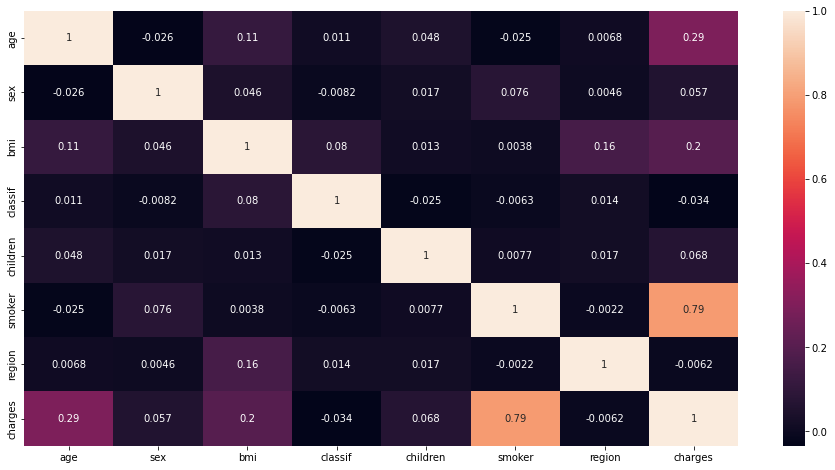

In [24]:
plt.figure(figsize=(16,8))
sb.heatmap(data=cor,annot=True)
plt.show()

# so features which im considering are smoker which have correlation of 0.79, age which have correlation of 0.27 and last BMI have correlation of 0.2.

# Visualization of data

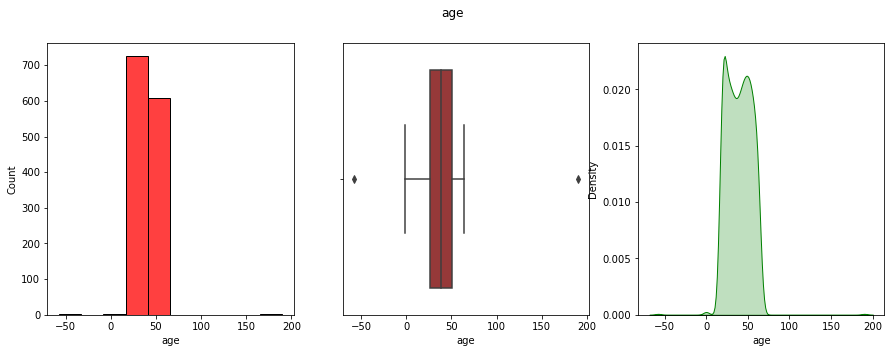

In [25]:
plt.figure(figsize=(15,5))
plt.suptitle('age')
plt.subplot(131)
sb.histplot(x = insurance['age'], color = "red",bins=(10)) 
plt.subplot(132)
sb.boxplot(x = insurance['age'], color = "brown") 
plt.subplot(133)
sb.kdeplot(x=insurance['age'],color='green',shade=True)
plt.show()

#from the graph we can see that disturbation of age which is highest in 0-50 range.

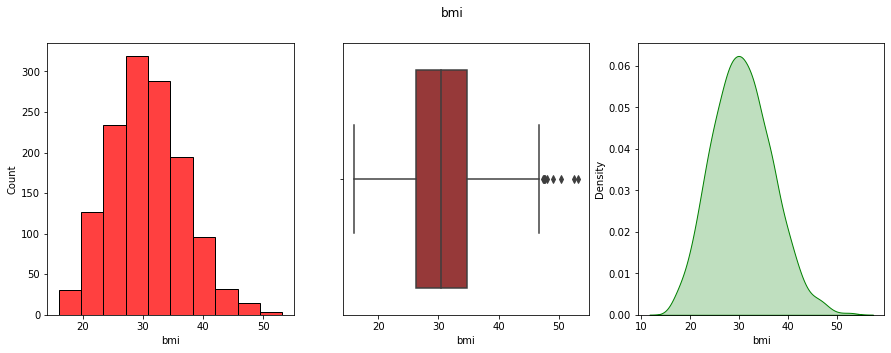

In [26]:
plt.figure(figsize=(15,5))
plt.suptitle('bmi')
plt.subplot(131)
sb.histplot(x = insurance['bmi'], color = "red",bins=(10)) 
plt.subplot(132)
sb.boxplot(x = insurance['bmi'], color = "brown") 
plt.subplot(133)
sb.kdeplot(x=insurance['bmi'],color='green',shade=True)
plt.show()

#from the graph we can see that at at 30 it is on the peak. 

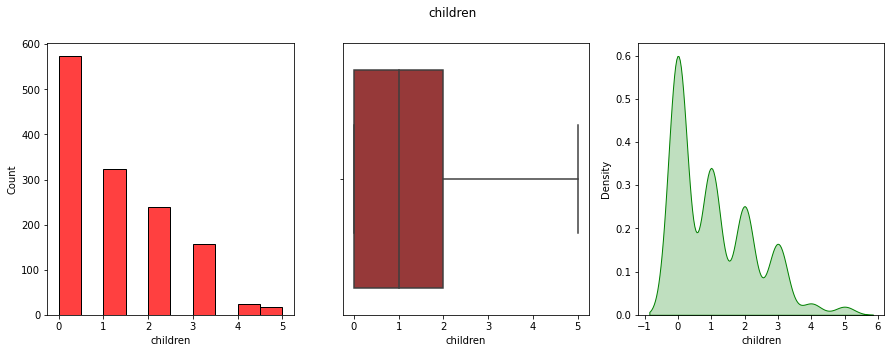

In [27]:
plt.figure(figsize=(15,5))
plt.suptitle('children')
plt.subplot(131)
sb.histplot(x = insurance['children'], color = "red",bins=(10)) 
plt.subplot(132)
sb.boxplot(x = insurance['children'], color = "brown") 
plt.subplot(133)
sb.kdeplot(x=insurance['children'],color='green',shade=True)
plt.show()

#from the graph we can see that 0 bin has the highest no of points.

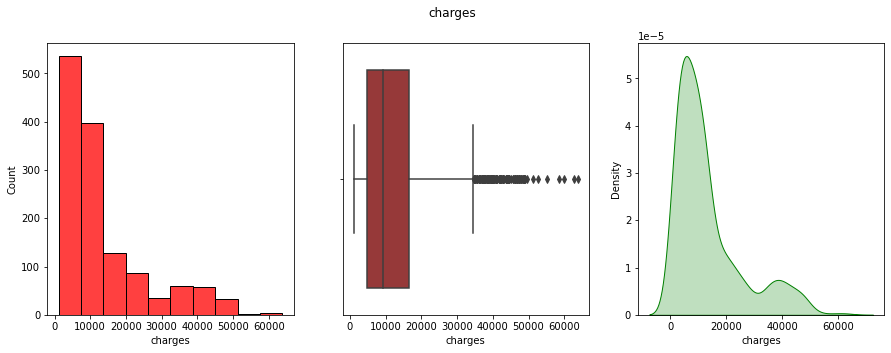

In [28]:
plt.figure(figsize=(15,5))
plt.suptitle('charges')
plt.subplot(131)
sb.histplot(x = insurance['charges'], color = "red",bins=(10)) 
plt.subplot(132)
sb.boxplot(x = insurance['charges'], color = "brown") 
plt.subplot(133)
sb.kdeplot(x=insurance['charges'],color='green',shade=True)
plt.show()

#from the graph we can see that from point 0 to 10000 it has the highest data point.

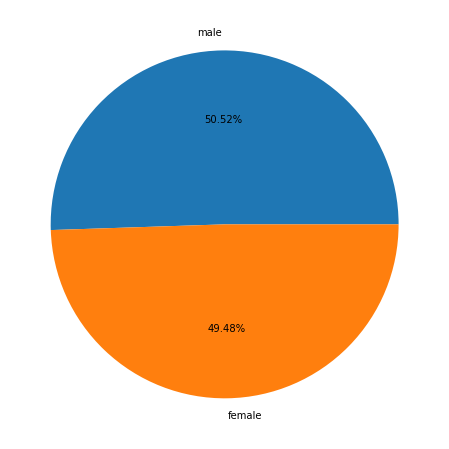

In [29]:
perc=insurance['sex'].value_counts()
plt.figure(figsize=(16,8))
lbl=list(insurance['sex'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%')
plt.show()


#from the graph we can see that male and female are little equally distribution 

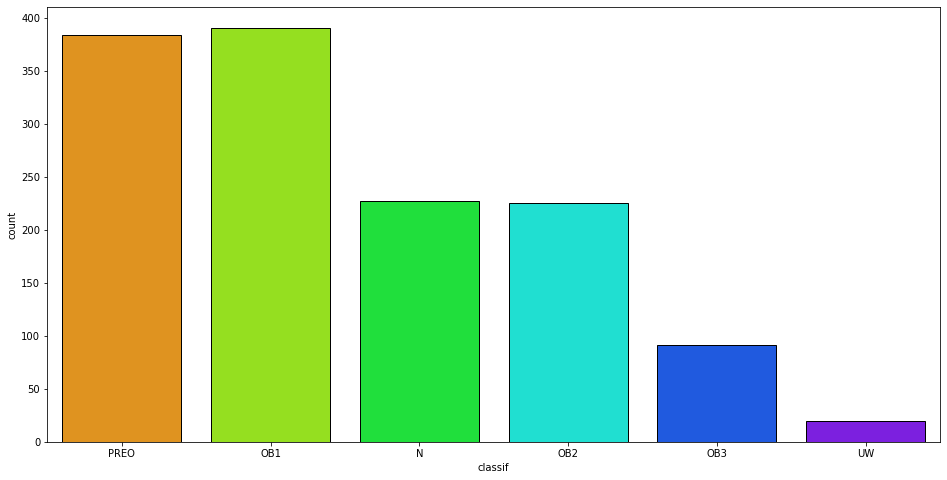

In [30]:
plt.figure(figsize=(16,8))
sb.countplot(x=insurance['classif'],ec='black',palette='gist_rainbow')
plt.show()

#from the graph we can see that OB1 is the highest as compare to others

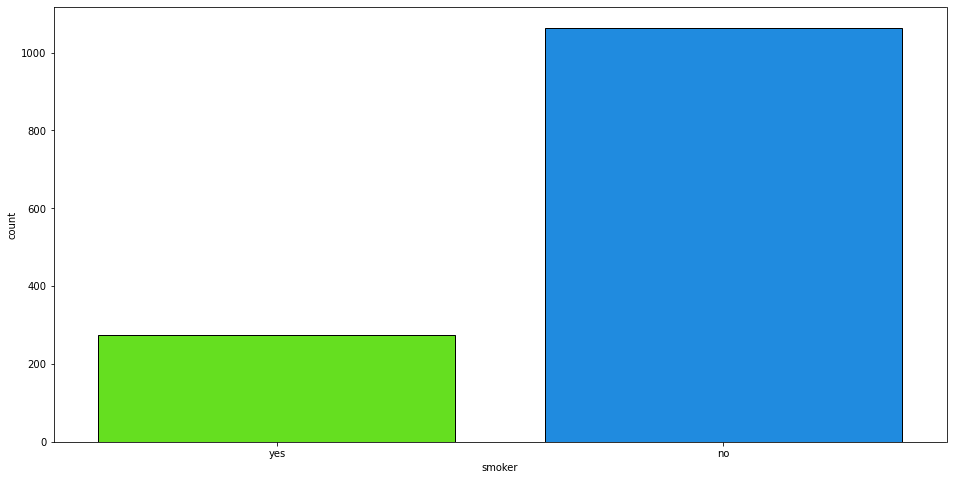

In [31]:
plt.figure(figsize=(16,8))
sb.countplot(x=insurance['smoker'],ec='black',palette='gist_rainbow')
plt.show()

#from the graph we can see that non-smoker are more than smoker.

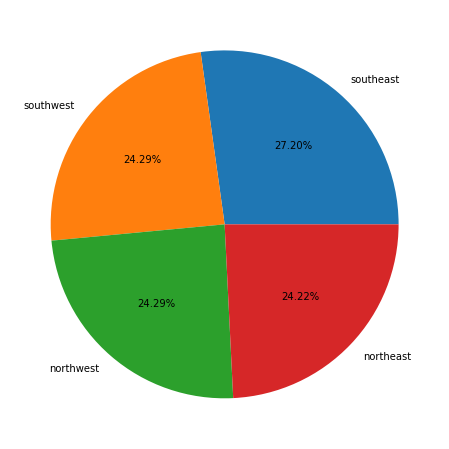

In [32]:
perc=insurance['region'].value_counts()
plt.figure(figsize=(16,8))
lbl=list(insurance['region'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%')
plt.show()


#from the pie-chart we can see that southeast region is highest among others.

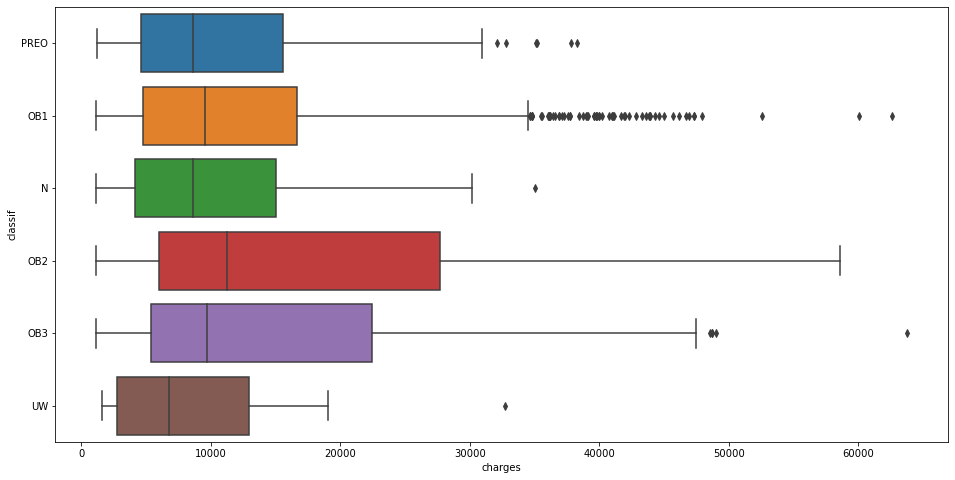

In [33]:
plt.figure(figsize=(16,8))
sb.boxplot(data=insurance,x=insurance['charges'],y=insurance['classif'])
plt.show()

#from the graph we can see that OB2 is highest in charges among others.

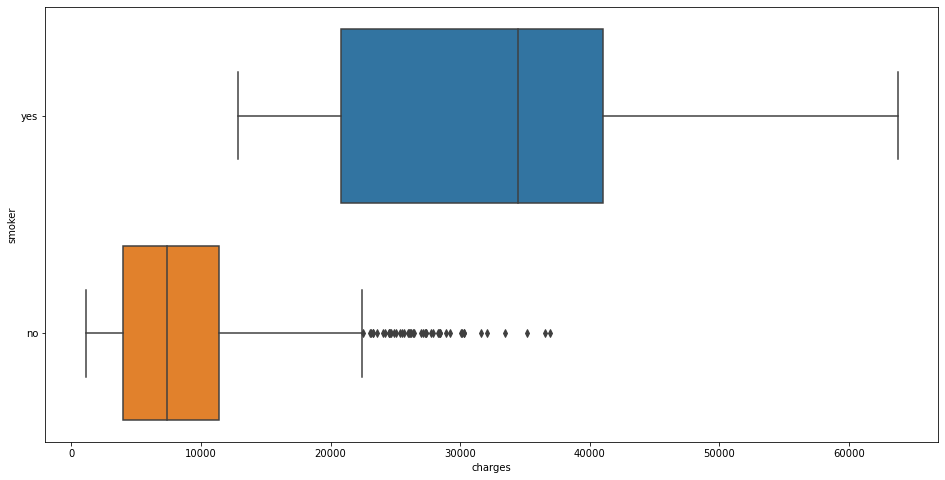

In [34]:
plt.figure(figsize=(16,8))
sb.boxplot(data=insurance,x=insurance['charges'],y=insurance['smoker'])
plt.show()

#from the graph we can see that smoker are more in charges as compare to others.

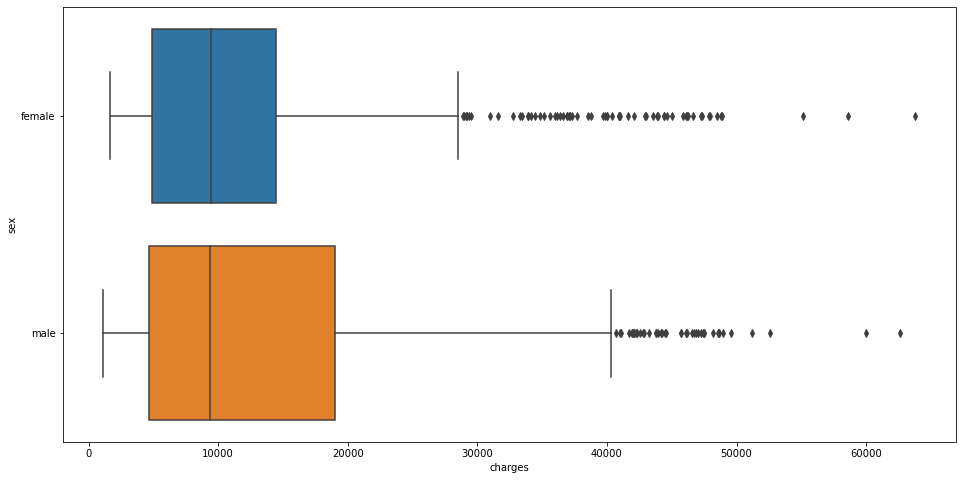

In [35]:
plt.figure(figsize=(16,8))
sb.boxplot(data=insurance,x=insurance['charges'],y=insurance['sex'])
plt.show()

#from the graph we can see that male is more as compare to female considering charges.

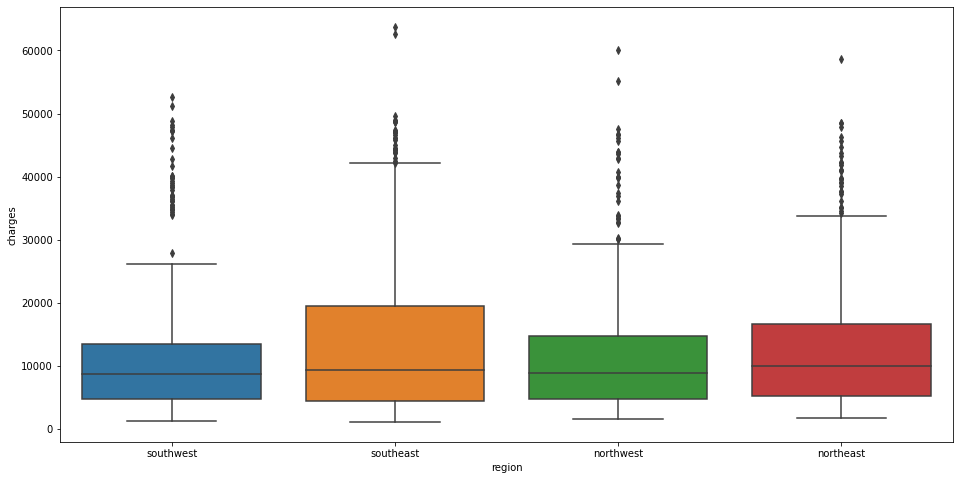

In [36]:
plt.figure(figsize=(16,8))
sb.boxplot(data=insurance,y=insurance['charges'],x=insurance['region'])
plt.show()

#From the graph we can see that southeast region is highest considering charges among others.

# Splitting the data into train and test.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
results, names = list(), list()

In [39]:
x=scaled_df[['age','bmi','smoker','children']]
y=scaled_df.charges

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(936, 4) (936,) (402, 4) (402,)


# MODELING 

# USING LINEAR REGRESSION

In [41]:
model=LinearRegression().fit(x_train,y_train)

In [42]:
coeff_of_det=model.score(x_train,y_train)
print("Co-efficient of determination (R^2)  :", coeff_of_det)
print('Intercept =',model.intercept_)# c
print('slope =',model.coef_  )# m

Co-efficient of determination (R^2)  : 0.7425796681983834
Intercept = -0.004496261102380927
slope = [0.31099743 0.15748369 0.78678671 0.04121699]


In [43]:
y_predict=model.predict(x_test) # y_actual=y_test
y_predict

array([ 1.82516269e+00, -5.89451816e-01, -5.90122685e-01,  1.08636417e+00,
       -8.99939198e-04, -5.34300523e-01, -6.88698072e-01, -2.69491227e-01,
        1.66811497e+00, -1.36694360e-01, -4.13704224e-01, -2.32489702e-01,
        1.82520441e+00, -1.24398042e-01, -9.63575345e-01,  1.85960820e+00,
       -8.88508264e-02, -3.13803809e-01,  1.29960656e+00, -1.76295032e-01,
       -9.58671824e-01, -3.57769601e-01, -4.38916004e-01, -1.78346771e-01,
        1.66990837e+00,  2.14269903e+00,  1.23014695e-01, -7.94311347e-01,
       -1.66367229e-01,  1.10909280e-01, -9.29406589e-01,  1.47828597e+00,
       -9.56237572e-01,  1.30306740e-01, -2.57409144e-02, -3.35191278e-01,
       -9.11410007e-01, -4.99985885e-01, -1.01757410e+00, -3.88737376e-01,
       -5.05472934e-01,  1.70948562e+00, -8.67894168e-01,  8.41941648e-02,
       -2.25630301e-01,  1.43137094e+00, -6.30172603e-01, -8.18903096e-01,
       -8.41048177e-01, -6.49761674e-01, -1.56457732e-01, -5.58353992e-03,
       -8.39923265e-02, -

In [44]:
data = pd.DataFrame()
data['actual_y'] = y_test
data['predicted_y'] = y_predict

In [45]:
data

,actual_y,predicted_y
338,2.366586,1.825163
620,-0.793944,-0.589452
965,-0.704150,-0.590123
128,1.607847,1.086364
329,-0.340825,-0.000900
...,...,...
659,0.092848,0.041853
893,2.555224,1.964656
584,-0.993567,-1.143000
1290,-0.506921,-0.674384


In [46]:
MSE=mean_absolute_error(y_test,y_predict)
MAE=mean_squared_error(y_test,y_predict)
RMSE=mean_squared_error(y_test,y_predict,squared=False)
print('MSE =',MSE)
print('RMSE =',RMSE)
print('MAE =',MAE)
                        

MSE = 0.33526045809897953
RMSE = 0.49164364802120425
MAE = 0.24171347663959775


# Linear Regression with one independent features

In [64]:
x1=scaled_df['smoker']
y=scaled_df.charges

In [65]:
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=10)

In [66]:
x1_train=x1_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
x1_test=x1_test.values.reshape(-1,1)

In [67]:
x1_train.shape

(936, 1)

In [68]:
x1_test.shape

(402, 1)

In [69]:
y_train.shape

(936, 1)

In [70]:
y_test.shape

(402,)

In [71]:
mo1=LinearRegression().fit(x1_train,y_train)          

In [87]:
c=mo1.intercept_                             # intercept of the line = C
m=mo1.coef_                                  # co-efficient of the line= M
coeff_of_dete=mo1.score(x1_train,y_train)    # co-efficient of determination(R^2)
print("Intercept of line (C)                :", c)
print("Co-efficiient of the line (M)        :", m)
print("Co-efficient of determination (R^2)  :", coeff_of_dete)

Intercept of line (C)                : [0.01187633]
Co-efficiient of the line (M)        : [[0.80341076]]
Co-efficient of determination (R^2)  : 0.6189465597859612


In [73]:
y_pred=mo1.predict(x1_test)

In [74]:
df=pd.DataFrame()
df['actual']=y_test
df['predict']=y_pred
df

,actual,predict
7,-0.494728,-0.395825
999,-0.661073,-0.395825
1209,-0.076267,-0.395825
491,0.928725,-0.395825
625,-0.787573,-0.395825
...,...,...
854,0.895172,1.595067
554,0.380693,-0.395825
1278,0.759294,1.595067
374,-0.981282,-0.395825


In [75]:
mse1=mean_squared_error(y_test,y_pred)                    # mean squared error
mae1= mean_absolute_error(y_test,y_pred)                  # mean absolute error
rmse1=mean_squared_error(y_test,y_pred,squared=False)      # root mean squared error
print("Mean squared error        :",mse1)
print("Mean absolute error       :",mae1)
print("Root mean squared error   :",rmse1)

Mean squared error        : 0.3369203127368959
Mean absolute error       : 0.44289493184319384
Root mean squared error   : 0.5804483721545749


# Linear Regression with two independent features

In [77]:
x2=scaled_df[['smoker','age']]
y=scaled_df.charges

In [78]:
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=10)

In [79]:
mo2=LinearRegression().fit(x2_train,y_train)          

In [83]:
c2=mo2.intercept_                             # intercept of the line = C
m2=mo2.coef_                                  # co-efficient of the line= M
coeff_of_deter=mo2.score(x2_train,y_train)    # co-efficient of determination(R^2)
print("Intercept of line (C)                :", c2)
print("Co-efficiient of the line (M)        :", m2)
print("Co-efficient of determination (R^2)  :", coeff_of_deter)

Intercept of line (C)                : 0.010523476526002551
Co-efficiient of the line (M)        : [0.80845991 0.33476029]
Co-efficient of determination (R^2)  : 0.7282582400313211


In [84]:
y_pred2=mo2.predict(x2_test)

In [85]:
df2=pd.DataFrame()
df2['actual']=y_test
df2['predict']=y_pred2
df2

,actual,predict
7,-0.494728,-0.450213
999,-0.661073,-0.473984
1209,-0.076267,0.072743
491,0.928725,0.120284
625,-0.787573,-0.640379
...,...,...
854,0.895172,1.838439
554,0.380693,-0.735461
1278,0.759294,1.600732
374,-0.981282,-0.854315


In [86]:
mse2=mean_squared_error(y_test,y_pred2)                    # mean squared error
mae2= mean_absolute_error(y_test,y_pred2)                  # mean absolute error
rmse2=mean_squared_error(y_test,y_pred2,squared=False)      # root mean squared error
print("Mean squared error        :",mse2)
print("Mean absolute error       :",mae2)
print("Root mean squared error   :",rmse2)

Mean squared error        : 0.2752718541536263
Mean absolute error       : 0.3463633569553598
Root mean squared error   : 0.5246635628225257


# Linear Regression with three independent features

In [89]:
x3=scaled_df[['smoker','age','bmi']]
y=scaled_df.charges

In [90]:
x3_train,x3_test,y_train,y_test=train_test_split(x3,y,test_size=0.3,random_state=10)

In [91]:
mo3=LinearRegression().fit(x3_train,y_train)          

In [92]:
c3=mo3.intercept_                             # intercept of the line = C
m3=mo3.coef_                                  # co-efficient of the line= M
coeff_of_deter3=mo3.score(x3_train,y_train)    # co-efficient of determination(R^2)
print("Intercept of line (C)                :", c3)
print("Co-efficiient of the line (M)        :", m3)
print("Co-efficient of determination (R^2)  :", coeff_of_deter3)

Intercept of line (C)                : 0.0058184183638380245
Co-efficiient of the line (M)        : [0.80646404 0.30981854 0.16445548]
Co-efficient of determination (R^2)  : 0.7545278372986616


In [93]:
y_pred3=mo3.predict(x3_test)

In [94]:
df3=pd.DataFrame()
df3['actual']=y_test
df3['predict']=y_pred3
df3

,actual,predict
7,-0.494728,-0.529012
999,-0.661073,-0.574078
1209,-0.076267,0.207494
491,0.928725,-0.072782
625,-0.787573,-0.751142
...,...,...
854,0.895172,1.628362
554,0.380693,-0.426511
1278,0.759294,1.572392
374,-0.981282,-0.752199


In [95]:
mse3=mean_squared_error(y_test,y_pred3)                    # mean squared error
mae3= mean_absolute_error(y_test,y_pred3)                  # mean absolute error
rmse3=mean_squared_error(y_test,y_pred3,squared=False)      # root mean squared error
print("Mean squared error        :",mse3)
print("Mean absolute error       :",mae3)
print("Root mean squared error   :",rmse3)

Mean squared error        : 0.25168741163205255
Mean absolute error       : 0.34828675657814134
Root mean squared error   : 0.50168457384302


In [98]:
final_data=pd.DataFrame({'Models':['Linear Regression(with one features)','Linear Regression(with two features)','Linear Regression(with tree features)'],
                        'R^2 Value':[coeff_of_dete,coeff_of_deter,coeff_of_deter3],
                        'Mean Square Error':[mse1,mse2,mse3],
                        'Mean Absolute Error':[mae1,mae2,mae3],
                        'Root Mean Squared Error':[rmse1,rmse2,rmse3]})

In [99]:
final_data

,Models,R^2 Value,Mean Square Error,Mean Absolute Error,Root Mean Squared Error
0,Linear Regression(with one features),0.618947,0.336920,0.442895,0.580448
1,Linear Regression(with two features),0.728258,0.275272,0.346363,0.524664
2,Linear Regression(with tree features),0.754528,0.251687,0.348287,0.501685


### So the best model in linear regression will be LinearRegression with(three features) becouse it has highest R^2 value and less error as compare to others.

# USING DECISION TREE REGRESSOR METHOD

In [71]:
dtm = DecisionTreeRegressor()
model2= dtm.fit(x_train, y_train)

In [108]:
coeff_of_det2=model2.score(x_train,y_train)
print("Co-efficient of determination (R^2)  :", coeff_of_det2)

Co-efficient of determination (R^2)  : 0.9981024863143015


In [72]:
y_predict1 = model2.predict(x_test)

In [75]:
data1 = pd.DataFrame()
data1['actual_y'] = y_test
data1['predicted_y'] = y_predict1
data1

,actual_y,predicted_y
338,2.366586,2.298689
620,-0.793944,-0.759484
965,-0.704150,-0.682966
128,1.607847,0.475226
329,-0.340825,0.058769
...,...,...
659,0.092848,-0.026539
893,2.555224,2.716182
584,-0.993567,-0.953183
1290,-0.506921,-0.547675


In [76]:
print("R-Squared on train dataset={}".format(model2.score(x_train,y_train)))

R-Squared on train dataset=0.9981024863143015


In [77]:
print("R-Squared on test dataset={}".format(model2.score(x_test,y_test)))

R-Squared on test dataset=0.714521211247267


In [110]:
MSE_1 = round(mean_squared_error(y_test,y_predict1),2)
MAE_1= round(mean_absolute_error(y_test,y_predict1),2)
RMSE_1 = round(mean_squared_error(y_test,y_predict1,squared=False),2)
print('mean squared error : {},mean absolute error : {}, root mean squared error : {}'.format(MSE_1,MAE_1,RMSE_1))

mean squared error : 0.28,mean absolute error : 0.25, root mean squared error : 0.53


# USING RANDOM FOREST REGRESSOR METHOD

In [78]:
regressor = RandomForestRegressor() 

In [79]:
model3 = regressor.fit(x_train, y_train)

In [80]:
model3.score(x_train,y_train)

0.9762236269784104

In [121]:
coeff_of_det3=model3.score(x_train,y_train)
print("Co-efficient of determination (R^2)  :", coeff_of_det3)

Co-efficient of determination (R^2)  : 0.8222231895196392


In [82]:
regressor.fit(x_train,y_train)
regressor.fit(x_test,y_test)
print("R-Squared on train dataset={}".format(model3.score(x_train,y_train)))
print("R-Squared on test dataset={}".format(model3.score(x_test,y_test)))

R-Squared on train dataset=0.8222231895196392
R-Squared on test dataset=0.9740052527376322


In [83]:
y_predict3= model3.predict(x_test)

In [84]:
MSE1 = round(mean_squared_error(y_test,y_predict3),2)
MAE1 = round(mean_absolute_error(y_test,y_predict3),2)
RMSE1 = round(mean_squared_error(y_test,y_predict3,squared=False),2)
print('mean squared error : {},mean absolute error : {}, root mean squared error : {}'.format(MSE1,MAE1,RMSE1))

mean squared error : 0.03,mean absolute error : 0.09, root mean squared error : 0.16


# USING RANDOM FOREST REGRESSOR WITH HYPERPARAMETERS.

In [85]:
rf = RandomForestRegressor(random_state=30, n_jobs=-1)

In [86]:
 params = {
 'max_depth': [2,3,5,10,20],
 'min_samples_leaf': [5,10,20,50,100,200],   
 'n_estimators': [10,25,30,50,100,200] }  # these are the hyper parameters which are helping us to find best accuracy with passing the hyper parameters


In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
grid_search = GridSearchCV(estimator=rf,param_grid=params,cv = 4,n_jobs=-1, verbose=1, scoring="accuracy")

In [101]:
%%time
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 2.36 s
Wall time: 30.7 s


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=30),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [103]:
randomforest_best=grid_search.best_estimator_
randomforest_best

RandomForestRegressor(max_depth=2, min_samples_leaf=5, n_estimators=10,
                      n_jobs=-1, random_state=30)

In [104]:
rf_best=RandomForestRegressor(max_depth=2, min_samples_leaf=5, n_jobs=-1,random_state=30)
best_model=rf_best.fit(x_train,y_train)
y2_predict=best_model.predict(x_test)

In [105]:
y_pred_rf1=pd.DataFrame({'actual': y_test,'predicted_prob': grid_search.predict((x_test))})
y_pred_rf1

,actual,predicted_prob
338,2.366586,2.382445
620,-0.793944,-0.639530
965,-0.704150,-0.639530
128,1.607847,0.639604
329,-0.340825,-0.019936
...,...,...
659,0.092848,-0.019936
893,2.555224,2.382445
584,-0.993567,-0.639530
1290,-0.506921,-0.639530


In [106]:
coeff_of_det4=best_model.score(x_train,y_train)                    # co-efficient of determination(R^2)
print("Co-efficient of determination (R^2)  :", coeff_of_det4)

Co-efficient of determination (R^2)  : 0.8342447752915253


In [95]:
MSE2 = round(mean_squared_error(y_test,y_predict4),2)
MAE2= round(mean_absolute_error(y_test,y_predict4),2)
RMSE2 = round(mean_squared_error(y_test,y_predict4,squared=False),2)
print('mean squared error : {},mean absolute error : {}, root mean squared error : {}'.format(MSE2,MAE2,RMSE2))

mean squared error : 0.18,mean absolute error : 0.27, root mean squared error : 0.42


# Final Conclusion

In [122]:
m=['Model Type','R^2 Value','Mean Square Error','Mean Absolute Error','Root Mean Squared Error']
m1=['Liner Regression',coeff_of_det,MSE,MAE,RMSE]
m2=['Decision Tree',coeff_of_det2,MSE_1,MAE_1,RMSE_1]
m3=["Random Forest",coeff_of_det3,MSE1,MAE1,RMSE1]
m4=["Random Forest(tuned hyperparameters)",coeff_of_det4,MSE2,MAE2,RMSE2]

In [123]:
final_table=pd.DataFrame()
final_table['Model']=m
final_table["Model 1"]=m1
final_table['Model 2']=m2
final_table['Model 3']=m3
final_table['Model 4']=m4

In [124]:
final_table

,Model,Model 1,Model 2,Model 3,Model 4
0,Model Type,Liner Regression,Decision Tree,Random Forest,Random Forest(tuned hyperparameters)
1,R^2 Value,0.74258,0.998102,0.822223,0.834245
2,Mean Square Error,0.33526,0.28,0.03,0.18
3,Mean Absolute Error,0.241713,0.25,0.09,0.27
4,Root Mean Squared Error,0.491644,0.53,0.16,0.42


# Conclusion:- From the table we can see that if we consider R^2 value we can see that model 2 which is Decision tree has the highest R^2 value 0.99 from this we can see that this model is overfited so we will not consider this model 2 And  if we consider (MSE),(MAE) AND (RMSE) all the error with R^2 value. Then we can consider model 3 which is Random Forest is the best model becouse it has a very low errors as compare to others models. so considering all the errors and R^2  values the best model will be model 3 Random Forest becouse it has a quite good R^2 values and very less errors a compares to others models.